<a href="https://colab.research.google.com/github/Lilly-jhr/Telco-Customer-Churn-Prediction/blob/main/customer_churn_prediction_using_sklearn_and_NN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Telecom Customer Churn Prediction**
This project builds a Logistic Regression model (scikit-learn) and a simple
Neural Network (PyTorch) machine learning models to predict customer churn for a telecommunications company.

By identifying customers at high risk of leaving, the company can implement targeted retention strategies to reduce churn and increase revenue.

##Workflow

* Problem Definition & Business Understanding
* Data Collection & Understanding
* Data Preparation & Cleaning
* Model Development
* Model Evaluation & Interpretation
* Data Visualization & Communication



In [1]:
# Import necessary libraries
# Core data manipulation and analysis
import pandas as pd
import numpy as np

# Visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go

# Data preprocessing
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Feature selection
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.decomposition import PCA

# Model building
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.linear_model import LogisticRegression

# PyTorch modeling
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import TensorDataset, DataLoader

# Model evaluation
from sklearn.metrics import (accuracy_score, precision_score, recall_score, f1_score,
                           confusion_matrix, classification_report, roc_curve,
                           roc_auc_score, precision_recall_curve)

# Set visualization styles
sns.set(style="whitegrid")
plt.style.use('seaborn-v0_8-whitegrid')

#1. Problem Definition & Business Understanding

Telecommunications companies face significant challenges with customer churn. Each lost customer represents both lost revenue and increased acquisition costs. This project addresses this challenge by:

* Building a model to predict which
* customers are likely to churn
* Identifying key factors that contribute to customer churn
* Recommending targeted retention strategies based on these insights


#2. Data Collection & Understanding

In [2]:
from google.colab import drive
drive.mount('/content/drive')
DATA_PATH = '/content/drive/MyDrive/Colab Notebooks/WA_Fn-UseC_-Telco-Customer-Churn.csv'

try:
    df = pd.read_csv(DATA_PATH)
    print(f"Dataset loaded successfully. Shape: {df.shape}")
except Exception as e:
    print(f"An error occurred during data loading: {e}")
    exit()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Dataset loaded successfully. Shape: (7043, 21)


In [3]:
# Display basic information
print("\nDataset Preview:")
display(df.head())

# Check data types and missing values
print("\nData Types and Missing Values:")
print(df.info())

# Summary statistics
print("\nSummary Statistics:")
display(df.describe())

# Check for missing values
print("\nMissing Values Per Column:")
print(df.isnull().sum())


Dataset Preview:


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes



Data Types and Missing Values:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessB

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000



Missing Values Per Column:
customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64



Churn Distribution:
Churn
No     73.463013
Yes    26.536987
Name: proportion, dtype: float64


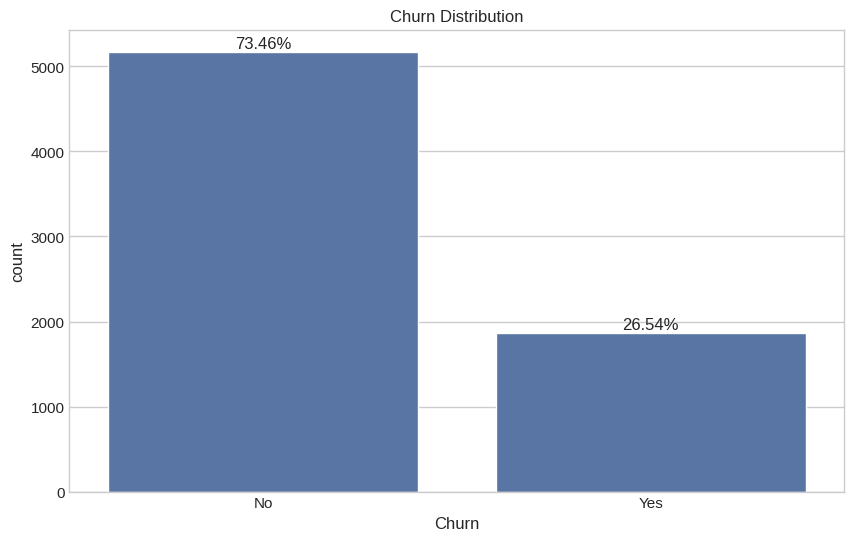

In [4]:
# Check target variable distribution
print("\nChurn Distribution:")
churn_dist = df['Churn'].value_counts(normalize=True) * 100
print(churn_dist)

# Visualize churn distribution
plt.figure(figsize=(10, 6))
ax = sns.countplot(x='Churn', data=df)
plt.title('Churn Distribution')

# Add percentage labels
for i, p in enumerate(ax.patches):
    ax.annotate(f'{churn_dist.values[i]:.2f}%',
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha = 'center', va = 'bottom')

plt.show()

 More detailed exploration of the dataset.


== Categorical Feature Analysis ==

Unique values in customerID:


,Count,Percentage
customerID,,
3186-AJIEK,1,0.014198
7590-VHVEG,1,0.014198
5575-GNVDE,1,0.014198
8775-CEBBJ,1,0.014198
2823-LKABH,1,0.014198
...,...,...
6713-OKOMC,1,0.014198
1452-KIOVK,1,0.014198
9305-CDSKC,1,0.014198



Unique values in gender:


,Count,Percentage
gender,,
Male,3555,50.47565
Female,3488,49.52435



Unique values in Partner:


,Count,Percentage
Partner,,
No,3641,51.69672
Yes,3402,48.30328



Unique values in Dependents:


,Count,Percentage
Dependents,,
No,4933,70.041176
Yes,2110,29.958824



Unique values in PhoneService:


,Count,Percentage
PhoneService,,
Yes,6361,90.316626
No,682,9.683374



Unique values in MultipleLines:


,Count,Percentage
MultipleLines,,
No,3390,48.132898
Yes,2971,42.183729
No phone service,682,9.683374



Unique values in InternetService:


,Count,Percentage
InternetService,,
Fiber optic,3096,43.958540
DSL,2421,34.374556
No,1526,21.666903


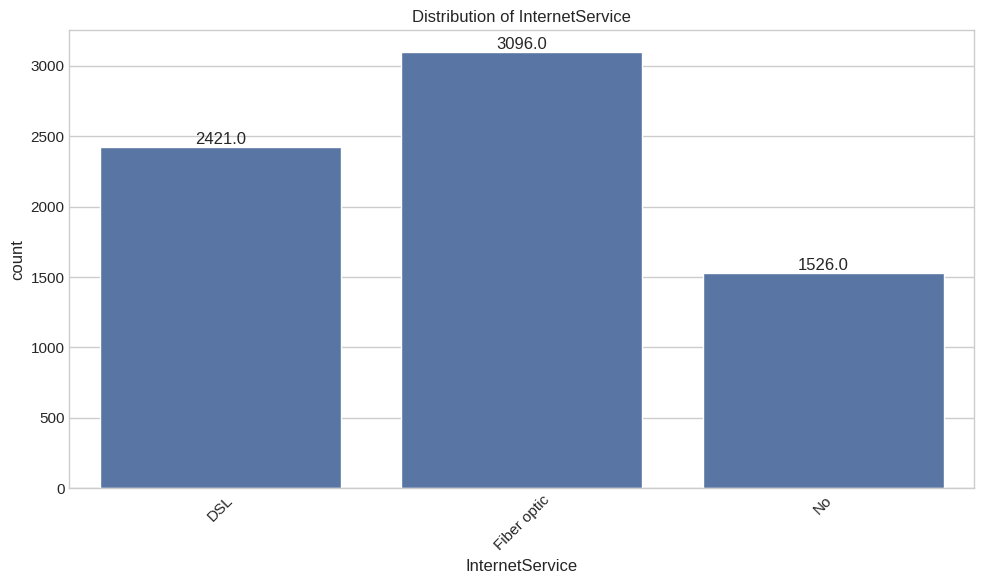


Unique values in OnlineSecurity:


,Count,Percentage
OnlineSecurity,,
No,3498,49.666335
Yes,2019,28.666761
No internet service,1526,21.666903



Unique values in OnlineBackup:


,Count,Percentage
OnlineBackup,,
No,3088,43.844952
Yes,2429,34.488144
No internet service,1526,21.666903



Unique values in DeviceProtection:


,Count,Percentage
DeviceProtection,,
No,3095,43.944342
Yes,2422,34.388755
No internet service,1526,21.666903



Unique values in TechSupport:


,Count,Percentage
TechSupport,,
No,3473,49.311373
Yes,2044,29.021724
No internet service,1526,21.666903



Unique values in StreamingTV:


,Count,Percentage
StreamingTV,,
No,2810,39.897771
Yes,2707,38.435326
No internet service,1526,21.666903



Unique values in StreamingMovies:


,Count,Percentage
StreamingMovies,,
No,2785,39.542808
Yes,2732,38.790288
No internet service,1526,21.666903



Unique values in Contract:


,Count,Percentage
Contract,,
Month-to-month,3875,55.019168
Two year,1695,24.066449
One year,1473,20.914383


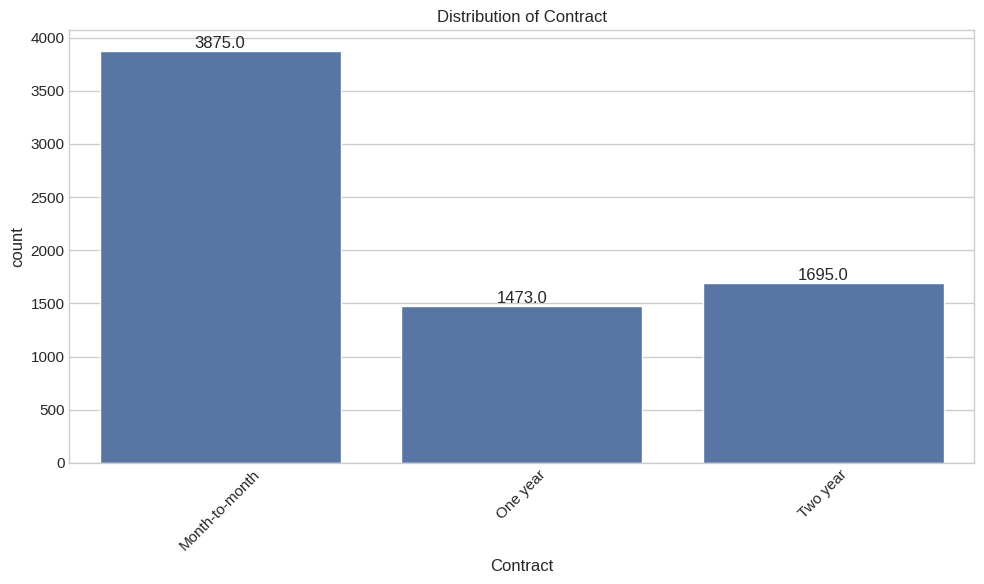


Unique values in PaperlessBilling:


,Count,Percentage
PaperlessBilling,,
Yes,4171,59.221922
No,2872,40.778078



Unique values in PaymentMethod:


,Count,Percentage
PaymentMethod,,
Electronic check,2365,33.579441
Mailed check,1612,22.887974
Bank transfer (automatic),1544,21.922476
Credit card (automatic),1522,21.610109


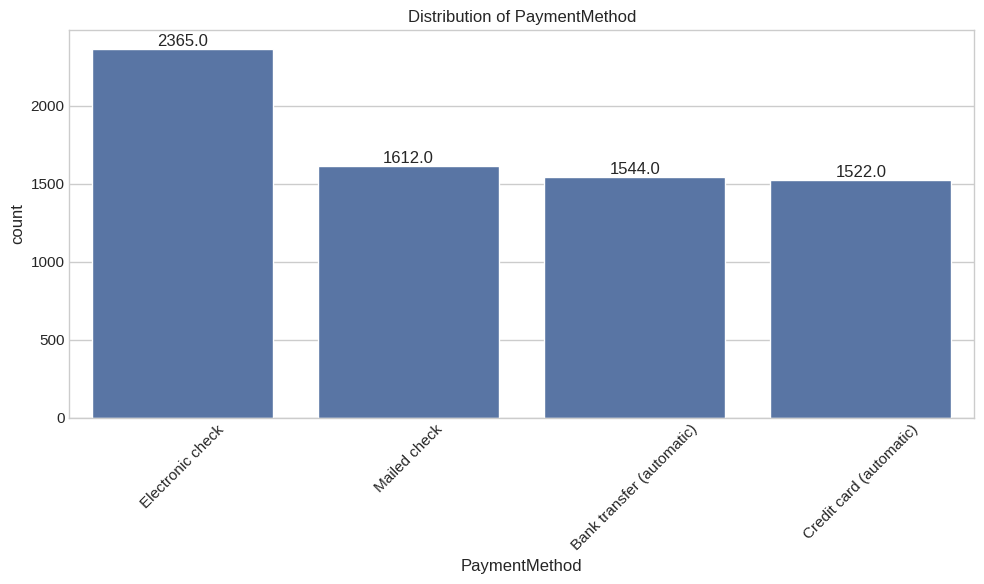


Unique values in TotalCharges:


,Count,Percentage
TotalCharges,,
,11,0.156183
20.2,11,0.156183
19.75,9,0.127786
20.05,8,0.113588
19.9,8,0.113588
...,...,...
130.15,1,0.014198
3211.9,1,0.014198
7843.55,1,0.014198



Unique values in Churn:


,Count,Percentage
Churn,,
No,5174,73.463013
Yes,1869,26.536987


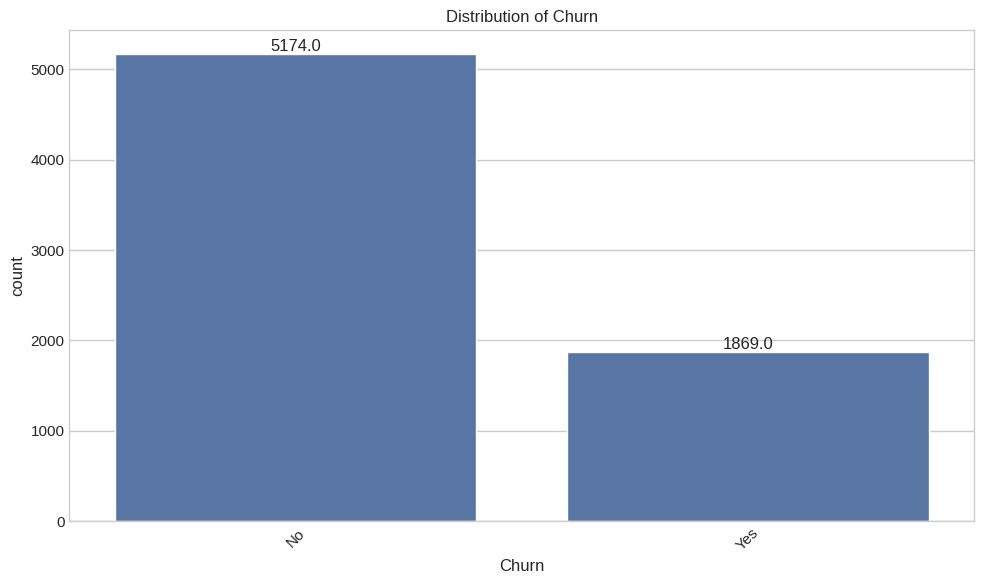

In [5]:
# Check unique values for categorical columns
print("\n== Categorical Feature Analysis ==")
categorical_columns = df.select_dtypes(include=['object']).columns

for col in categorical_columns:
    print(f"\nUnique values in {col}:")
    value_counts = df[col].value_counts()
    percentage = df[col].value_counts(normalize=True) * 100

    # Combine count and percentage for better readability
    counts_with_pct = pd.DataFrame({
        'Count': value_counts,
        'Percentage': percentage
    })

    display(counts_with_pct)

    # Visualize distribution for selected important columns
    if col in ['Contract', 'InternetService', 'PaymentMethod', 'Churn']:
        plt.figure(figsize=(10, 6))
        ax = sns.countplot(x=col, data=df)
        plt.title(f'Distribution of {col}')
        plt.xticks(rotation=45)

        # Add count labels
        for p in ax.patches:
            ax.annotate(f'{p.get_height()}',
                        (p.get_x() + p.get_width() / 2., p.get_height()),
                        ha = 'center', va = 'bottom')

        plt.tight_layout()
        plt.show()


== Numeric Feature Analysis ==

Summary for SeniorCitizen:


,SeniorCitizen
count,7043.000000
mean,0.162147
std,0.368612
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,1.000000


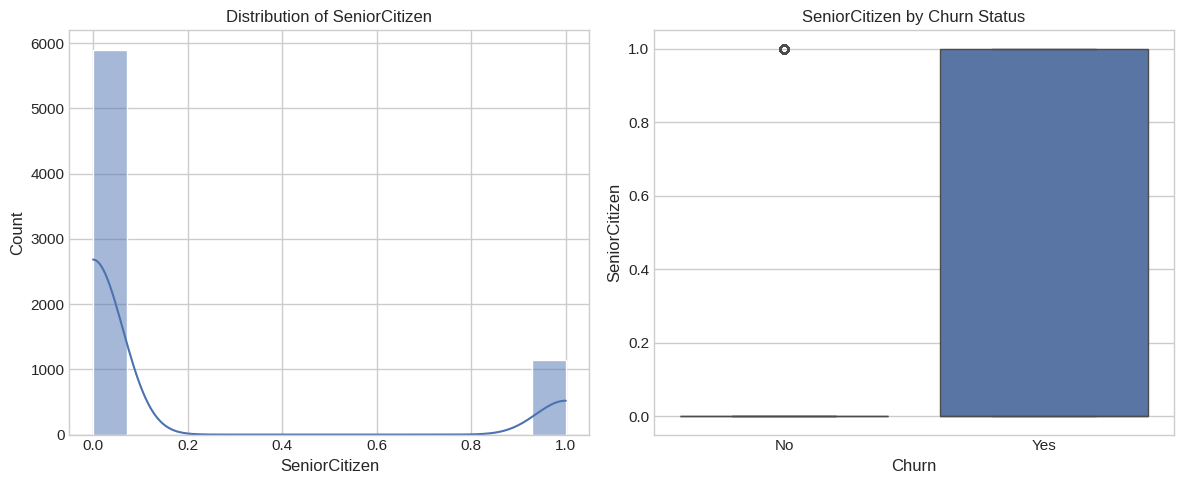


Summary for tenure:


,tenure
count,7043.000000
mean,32.371149
std,24.559481
min,0.000000
25%,9.000000
50%,29.000000
75%,55.000000
max,72.000000


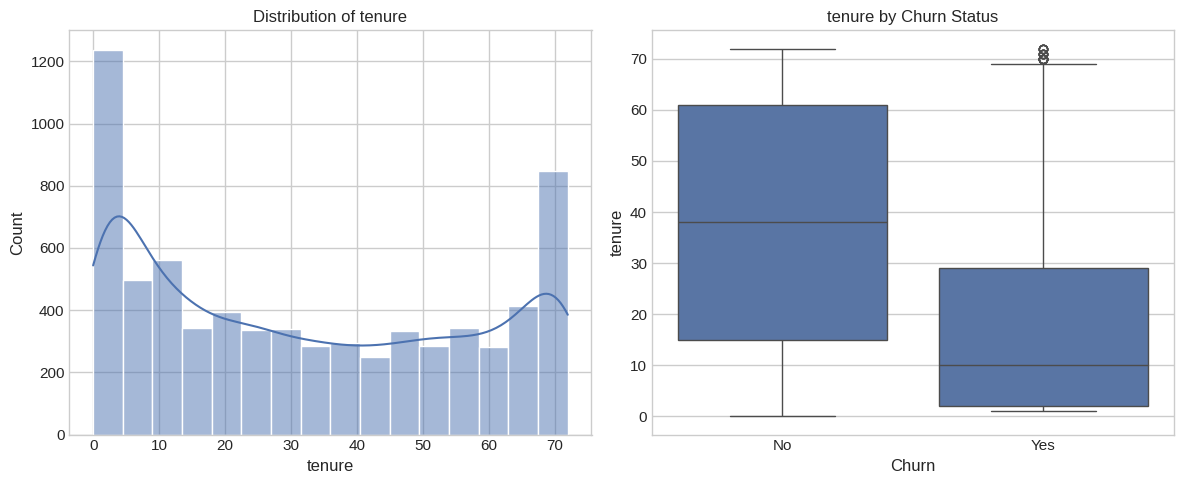


Summary for MonthlyCharges:


,MonthlyCharges
count,7043.000000
mean,64.761692
std,30.090047
min,18.250000
25%,35.500000
50%,70.350000
75%,89.850000
max,118.750000


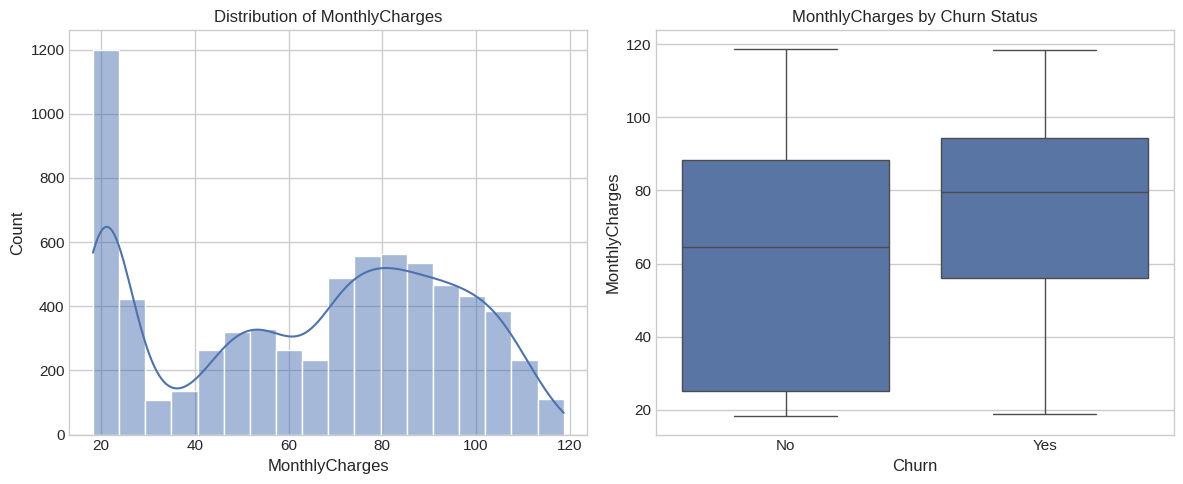


== Correlation with Churn ==
Correlation between Churn and SeniorCitizen: 0.1509
Correlation between Churn and tenure: -0.3522
Correlation between Churn and MonthlyCharges: 0.1934


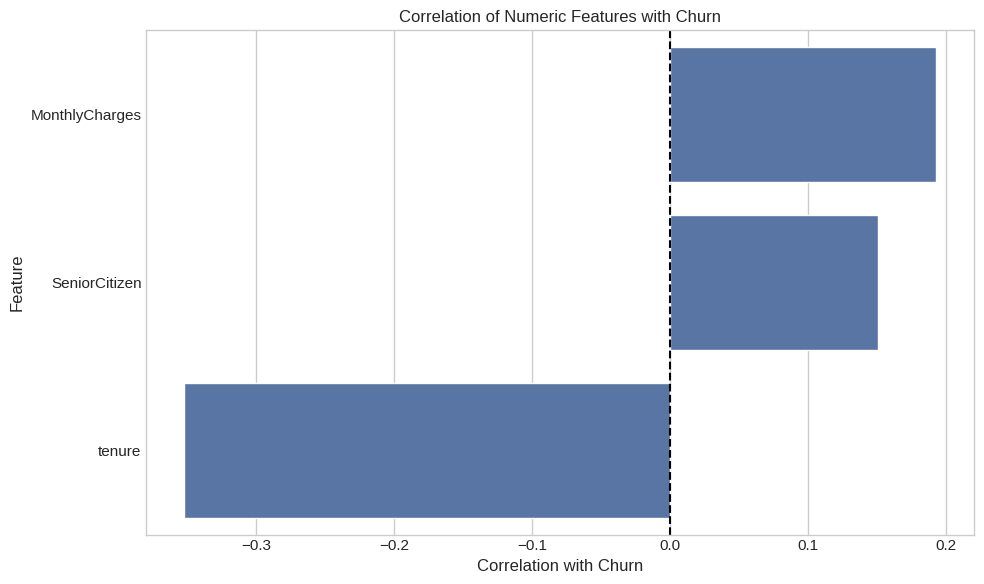

In [6]:
# Check numeric feature distributions
print("\n== Numeric Feature Analysis ==")
numeric_columns = df.select_dtypes(include=['int64', 'float64']).columns

for col in numeric_columns:
    print(f"\nSummary for {col}:")
    display(df[col].describe())

    # Visualize distribution
    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    sns.histplot(df[col], kde=True)
    plt.title(f'Distribution of {col}')

    plt.subplot(1, 2, 2)
    sns.boxplot(x='Churn', y=col, data=df)
    plt.title(f'{col} by Churn Status')

    plt.tight_layout()
    plt.show()

# Correlation with churn for numeric features
print("\n== Correlation with Churn ==")
# Convert 'Yes'/'No' in Churn to 1/0 for correlation analysis
churn_numeric = df['Churn'].map({'Yes': 1, 'No': 0})

correlations = []
for col in numeric_columns:
    if col != 'Churn':
        correlation = churn_numeric.corr(df[col])
        correlations.append({'Feature': col, 'Correlation with Churn': correlation})
        print(f"Correlation between Churn and {col}: {correlation:.4f}")

# Create correlation dataframe and plot
corr_df = pd.DataFrame(correlations).sort_values('Correlation with Churn', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x='Correlation with Churn', y='Feature', data=corr_df)
plt.title('Correlation of Numeric Features with Churn')
plt.axvline(x=0, color='black', linestyle='--')
plt.tight_layout()
plt.show()


In [7]:
#Check for data quality issues like outliers and inconsistencies
print("\n== Data Quality Check ==")

# Check for outliers in numeric columns
numeric_columns = df.select_dtypes(include=['int64', 'float64']).columns
print("\nPotential outliers (values > 3 std devs from mean):")

for col in numeric_columns:
    mean = df[col].mean()
    std = df[col].std()
    outliers = df[(df[col] > mean + 3*std) | (df[col] < mean - 3*std)]
    if not outliers.empty:
        print(f"  {col}: {len(outliers)} potential outliers")

# Check for potential errors or inconsistencies
print("\nUnique customer count:", df['customerID'].nunique())
print("Total rows:", len(df))

# TotalCharges investigation - check for non-numeric values
print("\nChecking TotalCharges for issues:")
print("Data type:", df['TotalCharges'].dtype)

# Check for empty or special values
print("Empty values:", df[df['TotalCharges'].str.strip() == ''].shape[0])



== Data Quality Check ==

Potential outliers (values > 3 std devs from mean):

Unique customer count: 7043
Total rows: 7043

Checking TotalCharges for issues:
Data type: object
Empty values: 11


#3. Data Preparation & Cleaning

In [8]:
# Create a copy to avoid modifying the original data
df_clean = df.copy()

In [9]:
# Check for missing values in TotalCharges
print("\nChecking for empty values in TotalCharges...")
missing_total_charges = df_clean[df_clean['TotalCharges'].str.strip() == '']
print(f"Found {len(missing_total_charges)} rows with empty TotalCharges")

# Display these rows to understand the pattern
if len(missing_total_charges) > 0:
    print("\nRows with empty TotalCharges:")
    display(missing_total_charges)

# Convert TotalCharges to numeric
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')


Checking for empty values in TotalCharges...
Found 11 rows with empty TotalCharges

Rows with empty TotalCharges:


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,No
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,...,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,No
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,No
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,No
3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,,No
3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,,No
4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,,No
5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,,No
6670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,...,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,,No


In [10]:
# Handle empty strings in TotalCharges
# For new customers (tenure=0), set TotalCharges to 0
df_clean.loc[df_clean['TotalCharges'].str.strip() == '', 'TotalCharges'] = '0'

# Convert TotalCharges to numeric
df_clean['TotalCharges'] = pd.to_numeric(df_clean['TotalCharges'])

# Confirm conversion was successful
print("\nData types after conversion:")
print(df_clean.dtypes[['MonthlyCharges', 'TotalCharges']])


Data types after conversion:
MonthlyCharges    float64
TotalCharges      float64
dtype: object


Encoded Partner to binary (1/0)
Encoded Dependents to binary (1/0)
Encoded PhoneService to binary (1/0)
Encoded PaperlessBilling to binary (1/0)
Encoded Churn to binary (1/0)


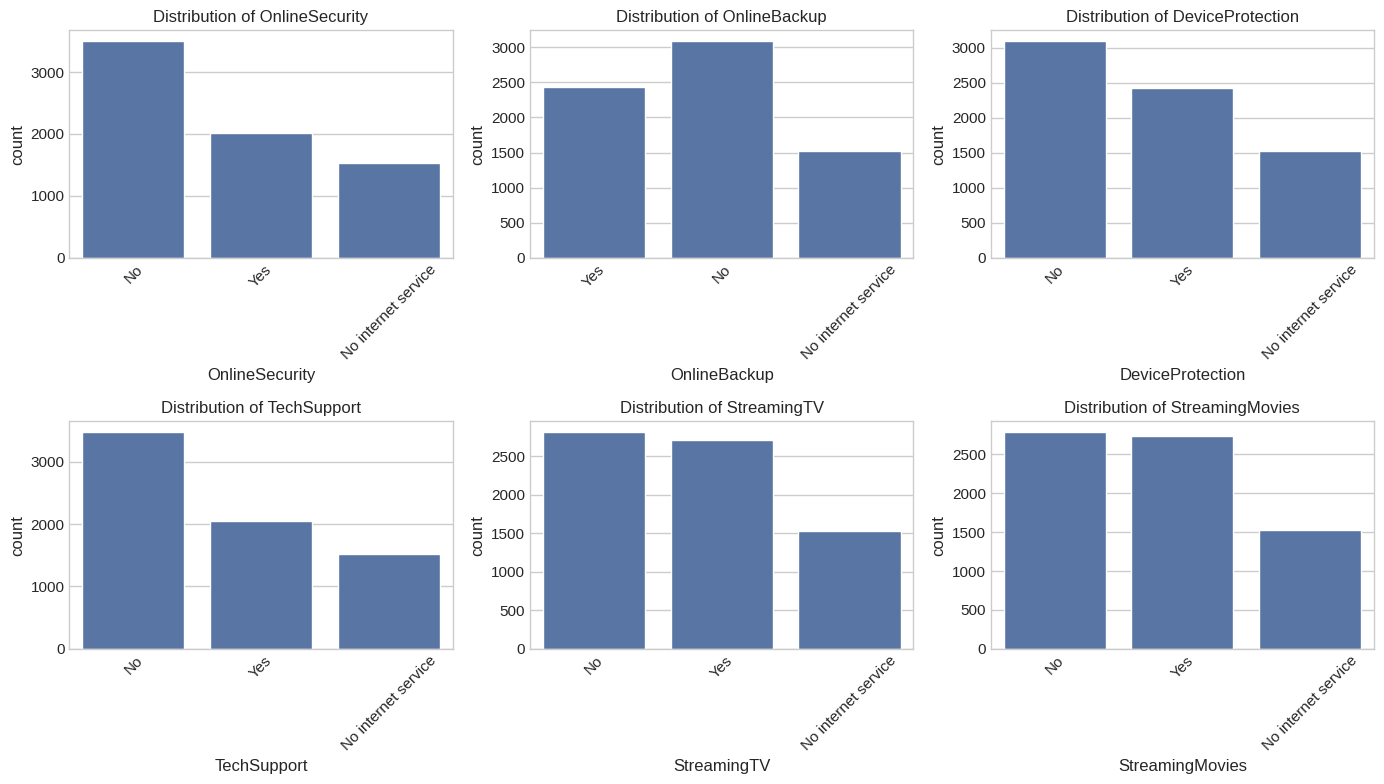

Encoded OnlineSecurity to binary (1/0)
Encoded OnlineBackup to binary (1/0)
Encoded DeviceProtection to binary (1/0)
Encoded TechSupport to binary (1/0)
Encoded StreamingTV to binary (1/0)
Encoded StreamingMovies to binary (1/0)
Encoded MultipleLines to binary (1/0)


In [11]:
# Encode binary categorical variables (Yes/No)
binary_columns = ['Partner', 'Dependents', 'PhoneService', 'PaperlessBilling', 'Churn']
for col in binary_columns:
    df_clean[col] = df_clean[col].map({'Yes': 1, 'No': 0})
    print(f"Encoded {col} to binary (1/0)")

# Handle categorical variables with more than two categories using one-hot encoding
# First the 'No internet service' and 'No phone service' values
internet_services = ['OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies']

# Visualize internet service features before cleaning
plt.figure(figsize=(14, 8))
for i, col in enumerate(internet_services, 1):
    plt.subplot(2, 3, i)
    sns.countplot(x=col, data=df_clean)
    plt.title(f'Distribution of {col}')
    plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Handle 'No internet service' responses
for col in internet_services:
    df_clean[col] = df_clean[col].replace({'No internet service': 'No'})

df_clean['MultipleLines'] = df_clean['MultipleLines'].replace({'No phone service': 'No'})

# Now map the Yes/No columns
for col in internet_services + ['MultipleLines']:
    df_clean[col] = df_clean[col].map({'Yes': 1, 'No': 0})
    print(f"Encoded {col} to binary (1/0)")

In [12]:
# One-hot encode the remaining categorical variables
print("\nOne-hot encoding remaining categorical variables...")
categorical_cols = ['gender', 'InternetService', 'Contract', 'PaymentMethod']
print(f"Columns to encode: {categorical_cols}")

# Show unique values for each categorical column before encoding
for col in categorical_cols:
    print(f"\nUnique values in {col}:")
    print(df_clean[col].value_counts())

# Perform one-hot encoding
df_clean = pd.get_dummies(df_clean, columns=categorical_cols, drop_first=True)

# Drop customerID as it's not relevant for modeling
df_clean = df_clean.drop('customerID', axis=1)

# Print the shape after preparation
print(f"\nData shape after cleaning and preparation: {df_clean.shape}")
print(f"Final columns: {df_clean.columns.tolist()}")

# Check for any remaining issues
print("\nChecking for any remaining missing values:")
missing_values = df_clean.isnull().sum()
if missing_values.sum() > 0:
    print(missing_values[missing_values > 0])
else:
    print("No missing values remain.")


One-hot encoding remaining categorical variables...
Columns to encode: ['gender', 'InternetService', 'Contract', 'PaymentMethod']

Unique values in gender:
gender
Male      3555
Female    3488
Name: count, dtype: int64

Unique values in InternetService:
InternetService
Fiber optic    3096
DSL            2421
No             1526
Name: count, dtype: int64

Unique values in Contract:
Contract
Month-to-month    3875
Two year          1695
One year          1473
Name: count, dtype: int64

Unique values in PaymentMethod:
PaymentMethod
Electronic check             2365
Mailed check                 1612
Bank transfer (automatic)    1544
Credit card (automatic)      1522
Name: count, dtype: int64

Data shape after cleaning and preparation: (7043, 24)
Final columns: ['SeniorCitizen', 'Partner', 'Dependents', 'tenure', 'PhoneService', 'MultipleLines', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'PaperlessBilling', 'MonthlyCharges', 'Tota

In [13]:
# an imputer to replace missing values with the mean
imputer = SimpleImputer(strategy='mean')

# Fit the imputer on the numeric columns of the original DataFrame (df) and transform
df[['tenure', 'MonthlyCharges', 'TotalCharges']] = imputer.fit_transform(df[['tenure', 'MonthlyCharges', 'TotalCharges']])

scaler = StandardScaler()
df_clean[['tenure', 'MonthlyCharges', 'TotalCharges']] = scaler.fit_transform(df[['tenure', 'MonthlyCharges', 'TotalCharges']])

In [14]:
# Train-test split
X = df_clean.drop('Churn', axis=1).values
y = df_clean['Churn'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#4. Model Developement

In [15]:
# %% Configuration & Constants
RANDOM_STATE = 42
TEST_SIZE = 0.2
BATCH_SIZE = 64
EPOCHS = 50
LEARNING_RATE = 0.001

Scikit-learn Logistic Regression

Training Logistic Regression model...

Evaluating Logistic Regression model:
Accuracy: 0.8211
Precision: 0.6850
Recall: 0.6005
F1 Score: 0.6400


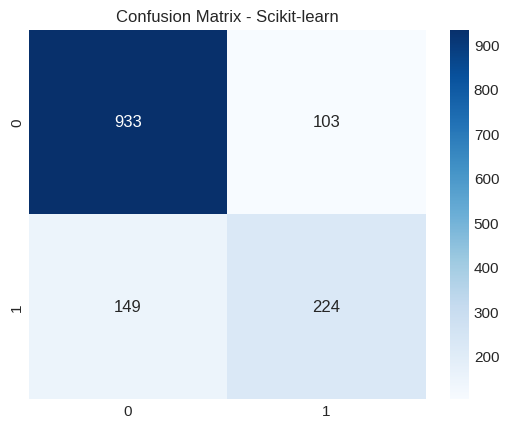

In [39]:
log_reg = LogisticRegression(penalty='l2',    # Regularization type
                             C=1.0,              # Inverse of regularization strength
                             solver='liblinear', # Algorithm to use in the optimization
                             max_iter=1000,   # Maximum iterations
                            random_state=42)

# Train the model
print("Training Logistic Regression model...")
log_reg.fit(X_train, y_train)

# Make predictions
y_pred_lr = log_reg.predict(X_test)
y_prob_lr = log_reg.predict_proba(X_test)[:, 1] # Probabilities for the positive class

# Evaluate the model
print("\nEvaluating Logistic Regression model:")
accuracy_lr = accuracy_score(y_test, y_pred_lr)
precision_lr = precision_score(y_test, y_pred_lr)
recall_lr = recall_score(y_test, y_pred_lr)
f1_lr = f1_score(y_test, y_pred_lr)
roc_auc_lr = roc_auc_score(y_test, y_prob_lr)

print(f"Accuracy: {accuracy_lr:.4f}")
print(f"Precision: {precision_lr:.4f}")
print(f"Recall: {recall_lr:.4f}")
print(f"F1 Score: {f1_lr:.4f}")

# Confusion Matrix
sns.heatmap(confusion_matrix(y_test, y_pred_lr), annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix - Scikit-learn")
plt.show()

PyTorch Neural Network

In [17]:
# Convert to tensors
X_train_tensor = torch.tensor(X_train.astype(np.float32))
y_train_tensor = torch.tensor(y_train.astype(np.float32)).unsqueeze(1)
X_test_tensor = torch.tensor(X_test.astype(np.float32))
y_test_tensor = torch.tensor(y_test.astype(np.float32)).unsqueeze(1)

train_data = TensorDataset(X_train_tensor, y_train_tensor)
train_loader = DataLoader(train_data, batch_size=32, shuffle=True)

test_data = TensorDataset(X_test_tensor, y_test_tensor)
test_loader = DataLoader(test_data, batch_size=32, shuffle=False)

In [18]:
class ChurnNN(nn.Module):
    def __init__(self, input_features):
        super(ChurnNN, self).__init__()
        self.layer_1 = nn.Linear(input_features, 64)
        self.relu1 = nn.ReLU()
        self.layer_2 = nn.Linear(64, 32)
        self.relu2 = nn.ReLU()
        self.output_layer = nn.Linear(32, 1)
        self.sigmoid = nn.Sigmoid() # Sigmoid for binary classification output

    def forward(self, x):
        x = self.layer_1(x)
        x = self.relu1(x)
        x = self.layer_2(x)
        x = self.relu2(x)
        x = self.output_layer(x)
        x = self.sigmoid(x) # to get probability
        return x

# Check for GPU availability and set device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Instantiate the model and move it to the device
input_dim = X_train.shape[1]
nn_model = ChurnNN(input_features=input_dim).to(device)
print(f"\nNeural Network Architecture:\n{nn_model}")

# Define Loss Function and Optimizer
criterion = nn.BCELoss() # Binary Cross Entropy Loss for binary classification
optimizer = optim.Adam(nn_model.parameters(), lr=LEARNING_RATE)


Neural Network Architecture:
ChurnNN(
  (layer_1): Linear(in_features=23, out_features=64, bias=True)
  (relu1): ReLU()
  (layer_2): Linear(in_features=64, out_features=32, bias=True)
  (relu2): ReLU()
  (output_layer): Linear(in_features=32, out_features=1, bias=True)
  (sigmoid): Sigmoid()
)



Training Neural Network model...
Epoch [10/50], Loss: 0.4106
Epoch [20/50], Loss: 0.3965
Epoch [30/50], Loss: 0.3816
Epoch [40/50], Loss: 0.3721
Epoch [50/50], Loss: 0.3516
Training finished.


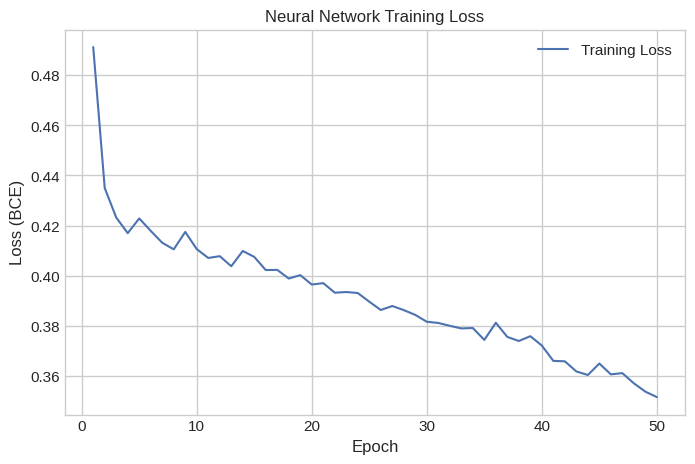

In [19]:
# Training Loop
print("\nTraining Neural Network model...")
train_losses = []
for epoch in range(EPOCHS):
    nn_model.train()
    epoch_loss = 0.0
    for batch_X, batch_y in train_loader:
        optimizer.zero_grad()

        # Forward pass
        outputs = nn_model(batch_X)

        # Calculate loss
        loss = criterion(outputs, batch_y)

        # Backward pass and optimization
        loss.backward()
        optimizer.step()

        epoch_loss += loss.item()

    avg_epoch_loss = epoch_loss / len(train_loader)
    train_losses.append(avg_epoch_loss)
    if (epoch + 1) % 10 == 0:
        print(f'Epoch [{epoch+1}/{EPOCHS}], Loss: {avg_epoch_loss:.4f}')

print("Training finished.")

# Plot training loss
plt.figure(figsize=(8, 5))
plt.plot(range(1, EPOCHS + 1), train_losses, label='Training Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss (BCE)')
plt.title('Neural Network Training Loss')
plt.legend()
plt.grid(True)
plt.show()


Evaluating Neural Network model:
Accuracy: 0.7955997161107168
Precision: 0.6357827476038339
Recall: 0.5335120643431636
F1 Score: 0.5801749271137027

Classification Report:
               precision    recall  f1-score   support

         0.0       0.84      0.89      0.86      1036
         1.0       0.64      0.53      0.58       373

    accuracy                           0.80      1409
   macro avg       0.74      0.71      0.72      1409
weighted avg       0.79      0.80      0.79      1409



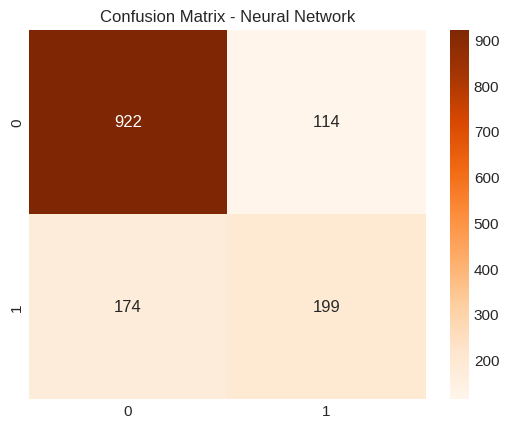

In [22]:
nn_model.eval()
with torch.no_grad():
    y_pred_probs = nn_model(X_test_tensor)
    y_pred_labels = (y_pred_probs >= 0.5).float()

# Convert to CPU
y_true = y_test_tensor.cpu().numpy()
y_pred = y_pred_labels.cpu().numpy()

accuracy_nn = accuracy_score(y_true, y_pred)
precision_nn = precision_score(y_true, y_pred)
recall_nn = recall_score(y_true, y_pred)
f1_nn = f1_score(y_true, y_pred)

print("\nEvaluating Neural Network model:")
print("Accuracy:", accuracy_nn)
print("Precision:", precision_nn)
print("Recall:", recall_nn)
print("F1 Score:", f1_nn)
print("\nClassification Report:\n", classification_report(y_true, y_pred))

sns.heatmap(confusion_matrix(y_true, y_pred), annot=True, fmt='d', cmap='Oranges')
plt.title("Confusion Matrix - Neural Network")
plt.show()

Model Performance Comparison:
           Logistic Regression (Pipeline)  Neural Network (PyTorch)
Metric                                                             
Accuracy                         0.821859                  0.795600
Precision                        0.687117                  0.635783
Recall                           0.600536                  0.533512
F1 Score                         0.640916                  0.580175


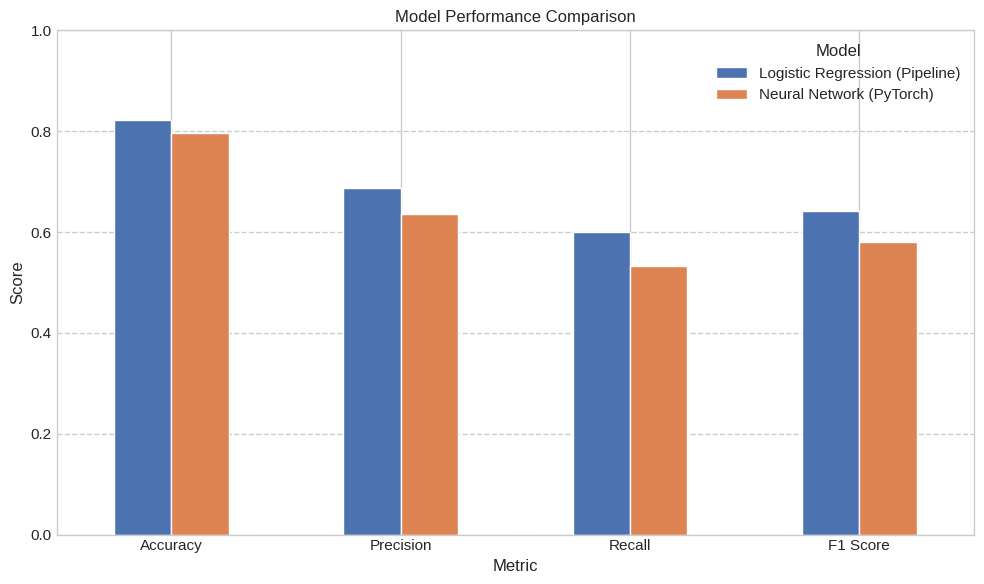

In [33]:
#Compare Model Performance
comparison_data = {
    'Metric': ['Accuracy', 'Precision', 'Recall', 'F1 Score'],
    'Logistic Regression (Pipeline)': [accuracy_lr, precision_lr, recall_lr, f1_lr],
    'Neural Network (PyTorch)': [accuracy_nn, precision_nn, recall_nn, f1_nn]
}
comparison_df = pd.DataFrame(comparison_data).set_index('Metric')
print("Model Performance Comparison:")
print(comparison_df)

comparison_df.plot(kind='bar', figsize=(10, 6))
plt.title('Model Performance Comparison')
plt.ylabel('Score'); plt.xticks(rotation=0); plt.ylim(0, 1.0)
plt.grid(axis='y', linestyle='--'); plt.legend(title='Model'); plt.tight_layout(); plt.show()

## Summary of Observations
Key observations based on this run's performance:
- The Logistic Regression model (Pipeline) outperformed the Neural Network across all key metrics.
- Logistic Regression achieved an F1-Score of 0.6409, significantly higher than the Neural Network's 0.5802.
- Precision vs. Recall Trade-off:
  - Logistic Regression (Pipeline): Precision=0.6871, Recall=0.6005
  - Neural Network: Precision=0.6358, Recall=0.5335
- Logistic Regression demonstrated substantially better Recall (0.6005 vs 0.5335). This is crucial for churn prediction, as it means the LR model successfully identified a larger percentage (approx 60%) of the customers who actually churned compared to the NN (approx 54%).
- Logistic Regression also had higher Precision (0.6871 vs 0.6358), meaning its churn predictions were more likely to be correct.
- Interpretability: Logistic Regression remains more interpretable, which can be valuable for understanding churn drivers.
- Neural Network Potential: While outperformed here, Neural Networks *can* potentially achieve higher performance with more extensive hyperparameter tuning (learning rate, batch size, epochs, layer sizes, activation functions, optimizer choice like AdamW), architectural changes (more layers, different structures), or more advanced techniques. The current NN configuration might be suboptimal.


In [26]:
print("\nBonus 1: Class Imbalance Analysis")
churn_distribution = pd.Series(y).value_counts(normalize=True) * 100
print(f"Churn Distribution in Training Set:\n{churn_distribution}")
is_imbalanced = churn_distribution.min() < 30 # Check if minority class is < 30%


Bonus 1: Class Imbalance Analysis
Churn Distribution in Training Set:
0    73.463013
1    26.536987
Name: proportion, dtype: float64


In [32]:
print("\nMetrics for Standard LR Model")

print(f"Accuracy: {accuracy_lr:.4f}")
print(f"Precision : {precision_lr:.4f}")
print(f"Recall : {recall_lr:.4f}")
print(f"F1 Score : {f1_lr:.4f}")

if is_imbalanced:
    print("\nThe dataset shows class imbalance. Accuracy can be misleading.")
    print("Precision, Recall, and F1 Score for the 'Churn=Yes' class are more informative.")


    print("\nTraining Balanced Logistic Regression model...")
    log_reg_balanced = LogisticRegression(
        penalty='l2',
        C=1.0,
        class_weight='balanced',
        solver='liblinear',
        max_iter=1000,
        random_state=RANDOM_STATE
    )
    # Fit on the PREPROCESSED training data
    log_reg_balanced.fit(X_train, y_train)

    # Predict on the PREPROCESSED test data
    y_pred_lr_bal = log_reg_balanced.predict(X_test)

    print("\n--- Metrics for Balanced LR Model ---")
    print(f"Accuracy: {accuracy_score(y_test, y_pred_lr_bal):.4f}")
    print(f"Precision : {precision_score(y_test, y_pred_lr_bal, zero_division=0):.4f}") # Likely lower
    print(f"Recall : {recall_score(y_test, y_pred_lr_bal, zero_division=0):.4f}")     # Likely higher
    print(f"F1 Score : {f1_score(y_test, y_pred_lr_bal, zero_division=0):.4f}")       # May improve
else:
    print("\nThe dataset does not show severe class imbalance based on the <30% minority class threshold.")



Metrics for Standard LR Model
Accuracy: 0.8219
Precision : 0.6871
Recall : 0.6005
F1 Score : 0.6409

The dataset shows class imbalance. Accuracy can be misleading.
Precision, Recall, and F1 Score for the 'Churn=Yes' class are more informative.

Training Balanced Logistic Regression model...

--- Metrics for Balanced LR Model ---
Accuracy: 0.7502
Precision : 0.5176
Recall : 0.8257
F1 Score : 0.6364


## Analysis of Class Imbalance Handling

**Key Observations:**

1.  **Recall Boost:** As expected, using `class_weight='balanced'` dramatically **increased Recall** for the 'Churn=Yes' class (from ~60% to ~83%). This is the primary goal of this technique – to significantly reduce False Negatives (missed churners).
2.  **Precision Drop:** This came at the cost of a substantial **decrease in Precision** (from ~69% to ~52%). The model became less confident in its 'Churn' predictions, leading to more False Positives (incorrectly flagging non-churners).
3.  **F1 Score:** The F1 score, balancing Precision and Recall, remained relatively stable, indicating that the large gain in Recall was mostly offset by the drop in Precision for this specific scenario.
4.  **Accuracy Decrease:** Overall accuracy decreased because the model, while improving on the minority class, made more mistakes on the larger majority class ('No Churn'). This highlights why accuracy is often misleading for imbalanced datasets.

**Business Implications:**

*   The **Standard Model** is better at avoiding wasted retention efforts (higher Precision) but misses a large portion (40%) of actual churners (lower Recall).
*   The **Balanced Model** is excellent at identifying potential churners (very high Recall) but will lead to more resources spent on customers who wouldn't have churned anyway (low Precision).


Effect of Regularization Parameter 'C' in Logistic Regression
Training Logistic Regression with different C values...
  Training with C = 0.01...
  Training with C = 0.1...
  Training with C = 1...
  Training with C = 10...

Metrics variation with C on the Test Set:
       C  Accuracy  Precision    Recall  F1 Score
0   0.01  0.822569   0.711340  0.554960  0.623494
1   0.10  0.819730   0.687697  0.584450  0.631884
2   1.00  0.821150   0.685015  0.600536  0.640000
3  10.00  0.820440   0.684049  0.597855  0.638054


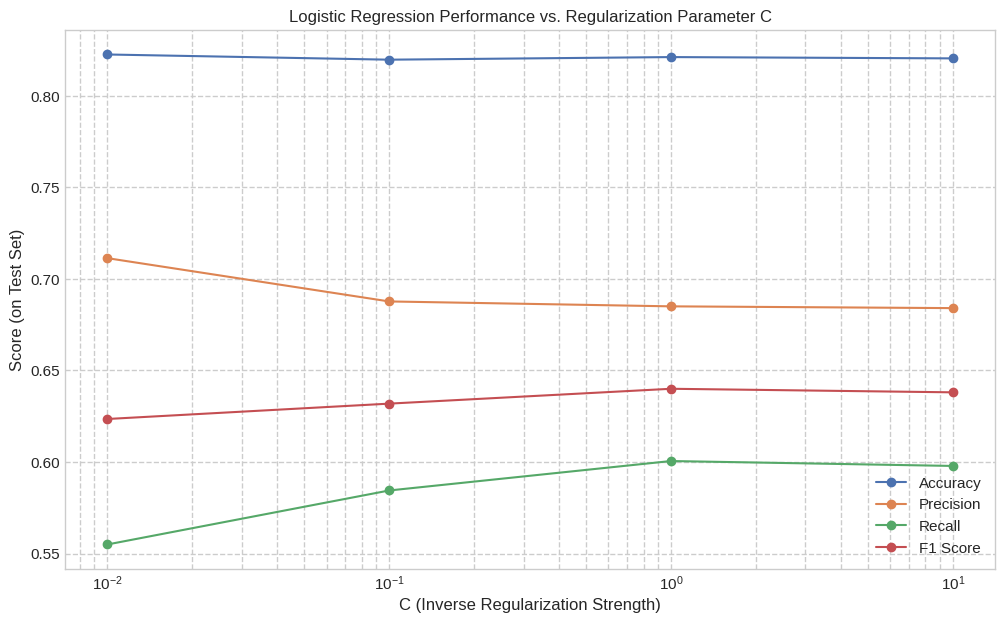

- Based on the test set results, C=1 yielded the best F1 score (0.6400). Compare this to the original C=1.0 result.


In [38]:
print("Effect of Regularization Parameter 'C' in Logistic Regression")
c_values = [0.01, 0.1, 1, 10]
lr_metrics = {'C': [], 'Accuracy': [], 'Precision': [], 'Recall': [], 'F1 Score': []}

print("Training Logistic Regression with different C values")
best_f1_c = -1
best_c = None

for c in c_values:
    print(f"  Training with C = {c}...")
    # Instantiate a new LR model instance for each C
    model_c = LogisticRegression(
        penalty='l2',
        C=c,  # Set current C value
        solver='liblinear',
        max_iter=1000,
        random_state=RANDOM_STATE
    )

    # Fit on the PREPROCESSED training data
    model_c.fit(X_train, y_train)

    # Predict on the PREPROCESSED test data
    y_pred = model_c.predict(X_test)

    # Calculate and store metrics from the test set prediction
    acc = accuracy_score(y_test, y_pred)
    pre = precision_score(y_test, y_pred, zero_division=0)
    rec = recall_score(y_test, y_pred, zero_division=0)
    f1 = f1_score(y_test, y_pred, zero_division=0)

    lr_metrics['C'].append(c); lr_metrics['Accuracy'].append(acc)
    lr_metrics['Precision'].append(pre); lr_metrics['Recall'].append(rec)
    lr_metrics['F1 Score'].append(f1)

    # Track best C based on F1
    if f1 > best_f1_c:
        best_f1_c = f1
        best_c = c

lr_metrics_df = pd.DataFrame(lr_metrics)
print("\nMetrics variation with C on the Test Set:")
print(lr_metrics_df)

# Plotting metrics vs C
plt.figure(figsize=(12, 7))
for metric in ['Accuracy', 'Precision', 'Recall', 'F1 Score']:
    plt.plot(lr_metrics_df['C'], lr_metrics_df[metric], marker='o', label=metric)
plt.xscale('log'); plt.xlabel('C (Inverse Regularization Strength)'); plt.ylabel('Score (on Test Set)')
plt.title('Logistic Regression Performance vs. Regularization Parameter C')
plt.legend(); plt.grid(True, which="both", ls="--"); plt.show()


if best_c is not None:
    print(f"- Based on the test set results, C={best_c} yielded the best F1 score ({best_f1_c:.4f}). Compare this to the original C=1.0 result.")
else:
    print("- Could not determine the best C value.")

## Analysis of Regularization Parameter `C` in Logistic Regression
**Observations:**

1.  **Performance Stability:** The model's performance is relatively stable across the tested range of `C` values (0.01 to 10.0). Accuracy, Precision, and F1 scores don't fluctuate dramatically, suggesting the model isn't highly sensitive to the exact regularization strength *within this range* for this dataset.
2.  **Strong Regularization (C=0.01):**
    *   Achieved the **highest Precision (0.7113)**. This means when it predicted 'Churn', it was most likely to be correct. Stronger regularization might make the model more "conservative" or demand stronger evidence before predicting the positive class, thus reducing False Positives.
    *   However, it had the **lowest Recall (0.5550)** and the lowest F1 score. The strong penalty likely oversimplified the model (slight underfitting relative to other C values), causing it to miss a significant number of actual churners (more False Negatives).
3.  **Weakening Regularization (C=0.1 to C=1.0):**
    *   As `C` increased (regularization weakened), **Recall improved noticeably**, peaking at **C=1.0 (0.6005)**. The model became better at identifying the actual churn cases.
    *   **Precision slightly decreased** as Recall improved, showing the typical trade-off.
    *   The **F1 Score also increased**, indicating a better overall balance between Precision and Recall, peaking at **C=1.0 (0.6400)**.
4.  **Weakest Regularization (C=10.0):**
    *   Increasing `C` further to 10.0 did not yield further improvement. Performance metrics were very similar to C=1.0, perhaps marginally worse in Recall and F1. This suggests that C=1.0 was already providing near-optimal complexity for this dataset, and further reducing the regularization penalty didn't help (and didn't seem to cause significant overfitting either, as performance didn't drop drastically).
